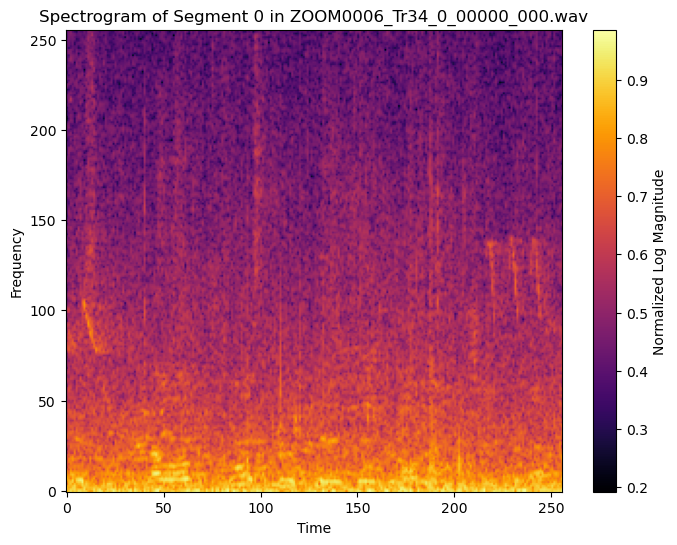

In [2]:
import os
import numpy as np
import librosa
import cv2
import cupy as cp
import matplotlib.pyplot as plt
from cupyx.scipy import signal as cupy_signal

# üìå **ÈÖçÁΩÆÂèÇÊï∞**
class config:
    FS = 32000  # ÈááÊ†∑Áéá
    N_FFT = 1095  # FFT ÁÇπÊï∞
    WIN_SIZE = 412  # È¢ëË∞±Á™óÂè£Â§ßÂ∞è
    WIN_LAP = 100  # È¢ëË∞±Á™óÂè£ÈáçÂè†Â§ßÂ∞è
    MIN_FREQ = 40  # ÊúÄÂ∞èÈ¢ëÁéá
    MAX_FREQ = 15000  # ÊúÄÂ§ßÈ¢ëÁéá
    SEGMENT_DURATION = 3  # ÊØèÊÆµ 3 Áßí
    SPEC_SIZE = (256, 256)  # È¢ëË∞±ÂõæÂ§ßÂ∞è (ÂÆΩ, È´ò)

# üìå **È¢ëË∞±ËΩ¨Êç¢ÂáΩÊï∞**
def oog2spec_via_cupy(audio_data):
    audio_data = cp.array(audio_data)

    # Â§ÑÁêÜ NaN Êï∞ÊçÆ
    mean_signal = cp.nanmean(audio_data)
    audio_data = cp.nan_to_num(audio_data, nan=mean_signal) if cp.isnan(audio_data).mean() < 1 else cp.zeros_like(audio_data)

    # ËÆ°ÁÆóÈ¢ëË∞±
    frequencies, times, spec_data = cupy_signal.spectrogram(
        audio_data, 
        fs=config.FS, 
        nfft=config.N_FFT, 
        nperseg=config.WIN_SIZE, 
        noverlap=config.WIN_LAP, 
        window='hann'
    )

    # ËøáÊª§È¢ëÁéáËåÉÂõ¥
    valid_freq = (frequencies >= config.MIN_FREQ) & (frequencies <= config.MAX_FREQ)
    spec_data = spec_data[valid_freq, :]

    # ÂØπÊï∞ÂèòÊç¢ÂíåÂΩí‰∏ÄÂåñ
    spec_data = cp.log10(spec_data + 1e-20)
    spec_data = spec_data - spec_data.min()
    spec_data = spec_data / spec_data.max()
    
    return spec_data.get()

# üìå **Êü•ÁúãÈü≥È¢ëÊåáÂÆö `seg_idx` ÁöÑÂ£∞Ë∞±Âõæ**
def view_audio_segment(file_path, seg_idx):
    # ËØªÂèñÈü≥È¢ë
    try:
        audio_data, _ = librosa.load(file_path, sr=config.FS)
    except Exception as e:
        print(f"‚ùå Âä†ËΩΩÂ§±Ë¥•: {file_path}, ÈîôËØØ: {e}")
        return
    
    # ËÆ°ÁÆóÈü≥È¢ëÊÄªÊó∂Èïø
    total_duration = len(audio_data) / config.FS
    num_segments = int(np.floor(total_duration / config.SEGMENT_DURATION))

    if seg_idx >= num_segments:
        print(f"‚ùå ÈîôËØØ: ËØ•Èü≥È¢ëÊúÄÂ§öÊúâ {num_segments} ‰∏™ segmentsÔºåÊó†Ê≥ïËÆøÈóÆ {seg_idx}")
        return

    # Ëé∑Âèñ `seg_idx` ÁâáÊÆµ
    start_idx = seg_idx * config.SEGMENT_DURATION * config.FS
    end_idx = start_idx + config.SEGMENT_DURATION * config.FS
    segment_audio = audio_data[start_idx:end_idx]

    # ÁîüÊàêÈ¢ëË∞±Âõæ
    spec_data = oog2spec_via_cupy(segment_audio)

    # Ë∞ÉÊï¥Â∞∫ÂØ∏
    spec_data = cv2.resize(spec_data, config.SPEC_SIZE, interpolation=cv2.INTER_AREA)

    # üìå **ÂèØËßÜÂåñÂ£∞Ë∞±Âõæ**
    plt.figure(figsize=(8, 6))
    plt.imshow(spec_data, cmap='inferno', aspect='auto', origin='lower')
    plt.colorbar(label="Normalized Log Magnitude")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title(f"Spectrogram of Segment {seg_idx} in {os.path.basename(file_path)}")
    plt.show()

# **Á§∫‰æãËøêË°å**
audio_file = "E:/AMR/DA/Projekt/data/data_from_betreuer/Ming Lin/Ming Lin/Elisenbrunnen/12.05.2015/ZOOM0006_Tr34_0_00000_000.wav"
segment_index = 0  # ÈÄâÊã©Ë¶ÅÊü•ÁúãÁöÑÁâáÊÆµÁ¥¢Âºï
view_audio_segment(audio_file, segment_index)


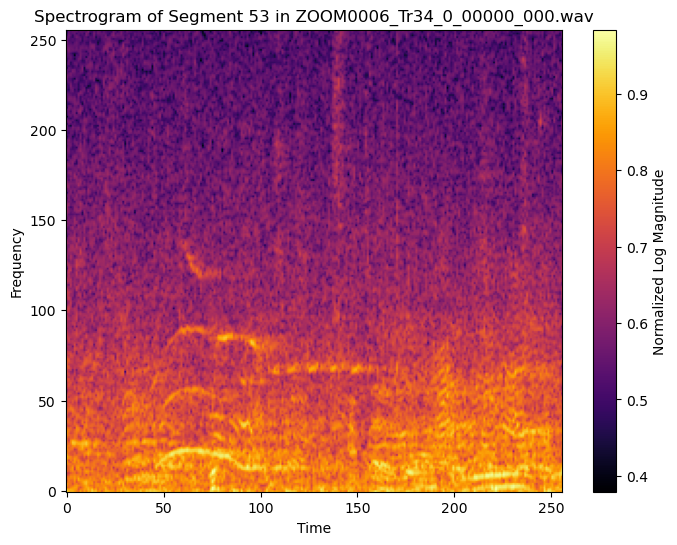

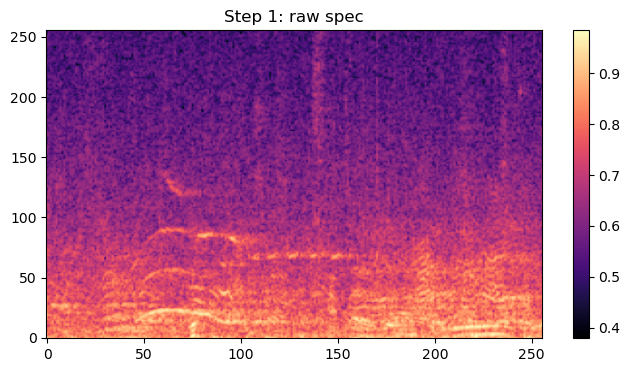

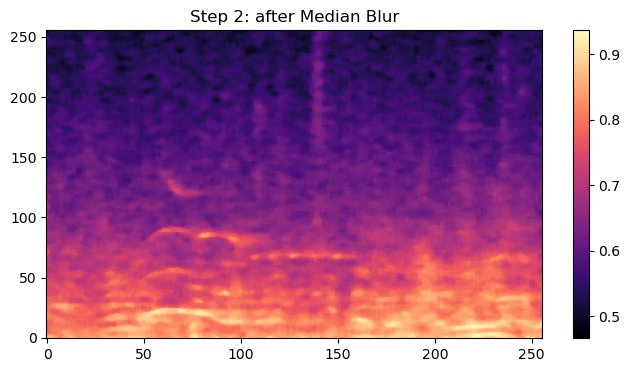

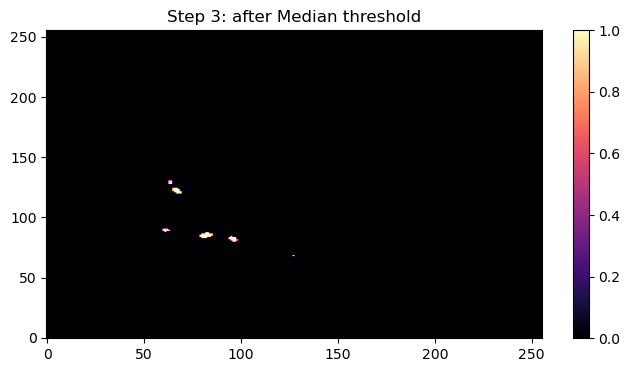

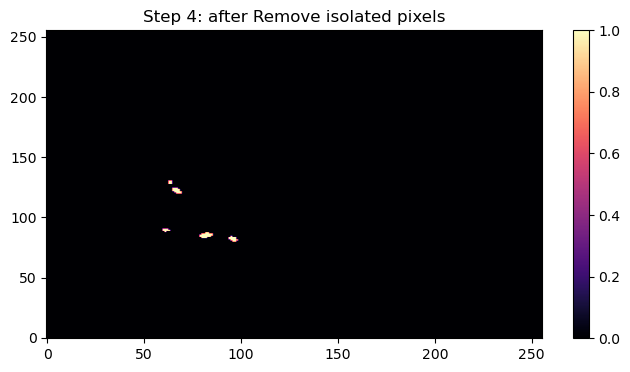

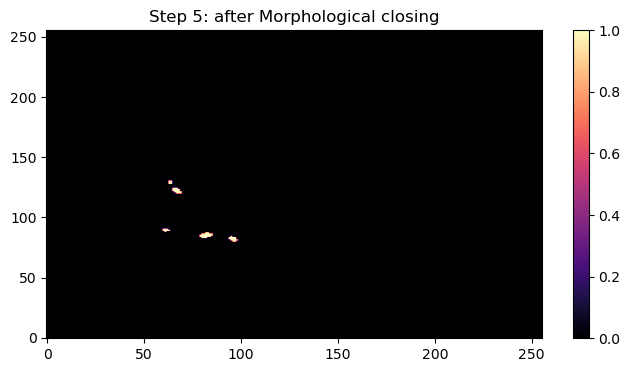

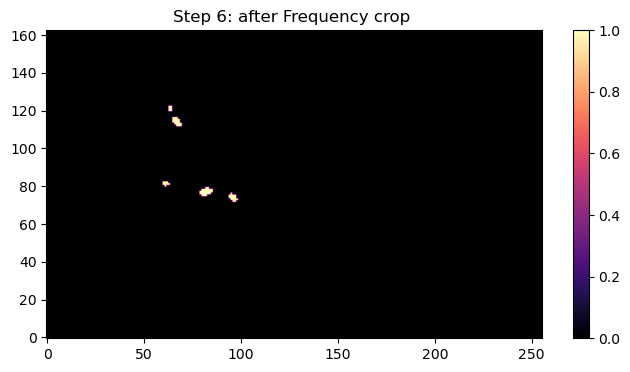

Step 7: Count active rows: 30.0
Step 8: has bird? True
üîç ËØ•ÊÆµÈü≥È¢ë 53 ÊòØÂê¶Âê´ÊúâÈ∏üÂ£∞? ‚úÖ ÊòØ


In [29]:
import os
import numpy as np
import librosa
import cv2
import cupy as cp
import matplotlib.pyplot as plt
from cupyx.scipy import signal as cupy_signal
from scipy import ndimage

# üìå **ÈÖçÁΩÆÂèÇÊï∞**
class config:
    FS = 32000  # ÈááÊ†∑Áéá
    N_FFT = 1095  # FFT ÁÇπÊï∞
    WIN_SIZE = 412  # È¢ëË∞±Á™óÂè£Â§ßÂ∞è
    WIN_LAP = 100  # È¢ëË∞±Á™óÂè£ÈáçÂè†Â§ßÂ∞è
    MIN_FREQ = 600  # ÊúÄÂ∞èÈ¢ëÁéá
    MAX_FREQ = 15000  # ÊúÄÂ§ßÈ¢ëÁéá
    SEGMENT_DURATION = 3  # ÊØèÊÆµ 3 Áßí
    SPEC_SIZE = (256, 256)  # È¢ëË∞±ÂõæÂ§ßÂ∞è (ÂÆΩ, È´ò)

# üìå **È¢ëË∞±ËΩ¨Êç¢ÂáΩÊï∞**
def oog2spec_via_cupy(audio_data):
    audio_data = cp.array(audio_data)

    # Â§ÑÁêÜ NaN Êï∞ÊçÆ
    mean_signal = cp.nanmean(audio_data)
    audio_data = cp.nan_to_num(audio_data, nan=mean_signal) if cp.isnan(audio_data).mean() < 1 else cp.zeros_like(audio_data)

    # ËÆ°ÁÆóÈ¢ëË∞±
    frequencies, times, spec_data = cupy_signal.spectrogram(
        audio_data, 
        fs=config.FS, 
        nfft=config.N_FFT, 
        nperseg=config.WIN_SIZE, 
        noverlap=config.WIN_LAP, 
        window='hann'
    )

    # ËøáÊª§È¢ëÁéáËåÉÂõ¥
    valid_freq = (frequencies >= config.MIN_FREQ) & (frequencies <= config.MAX_FREQ)
    spec_data = spec_data[valid_freq, :]

    # ÂØπÊï∞ÂèòÊç¢ÂíåÂΩí‰∏ÄÂåñ
    spec_data = cp.log10(spec_data + 1e-20)
    spec_data = spec_data - spec_data.min()
    spec_data = spec_data / spec_data.max()
    
    return spec_data.get()

# üìå **ÂèØËßÜÂåñ‰∏≠Èó¥Ê≠•È™§**
def visualize_step(title, img):
    plt.figure(figsize=(8, 4))
    plt.imshow(img, aspect='auto', cmap='magma', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()

# üìå **hasBird Ê£ÄÊµãÂáΩÊï∞**
def hasBird_debug(spec, threshold=16):
    img = spec.copy()

    # STEP 1: ÂéüÂßãÈ¢ëË∞±Âõæ
    visualize_step("Step 1: raw spec", img)
    
    # STEP 2: Median blur
    img = cv2.medianBlur(img, 5)
    visualize_step("Step 2: after Median Blur", img)

    # STEP 3: Median threshold
    col_median = np.median(img, axis=0, keepdims=True)
    row_median = np.median(img, axis=1, keepdims=True)
    img[img < row_median * 1.15] = 0
    img[img < col_median * 1.15] = 0  # baseline = 1.2
    img[img > 0] = 1
    visualize_step("Step 3: after Median threshold", img)

    # STEP 4: Remove isolated pixels
    struct = np.ones((3, 3))
    id_regions, num_ids = ndimage.label(img, structure=struct)
    id_sizes = np.array(ndimage.sum(img, id_regions, range(num_ids + 1)))
    area_mask = (id_sizes == 1)
    img[area_mask[id_regions]] = 0
    visualize_step("Step 4: after Remove isolated pixels", img)

    # STEP 5: Morphological closing
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5, 5), np.float32))
    visualize_step("Step 5: after Morphological closing", img)

    # STEP 6: Frequency crop (keeping middle frequency range)
    img = img[8:-85, :]
    visualize_step("Step 6: after Frequency crop ", img)

    # STEP 7: Count active rows
    row_max = np.max(img, axis=1)
    row_max = ndimage.binary_dilation(row_max, iterations=2).astype(row_max.dtype)
    rthresh = row_max.sum()

    print(f"Step 7: Count active rows: {rthresh}")

    # STEP 8: Apply threshold
    result = rthresh >= threshold
    print(f"Step 8: has bird? {result}")
    return result

# üìå **‰ªéÈü≥È¢ëÊèêÂèñ `seg_idx` ÁâáÊÆµÂπ∂Ê£ÄÊµãÊòØÂê¶Âê´È∏üÂ£∞**
def process_audio_segment(file_path, seg_idx, threshold=16):
    # ËØªÂèñÈü≥È¢ë
    try:
        audio_data, _ = librosa.load(file_path, sr=config.FS)
    except Exception as e:
        print(f"‚ùå Âä†ËΩΩÂ§±Ë¥•: {file_path}, ÈîôËØØ: {e}")
        return
    
    # ËÆ°ÁÆóÈü≥È¢ëÊÄªÊó∂Èïø
    total_duration = len(audio_data) / config.FS
    num_segments = int(np.floor(total_duration / config.SEGMENT_DURATION))

    if seg_idx >= num_segments:
        print(f"‚ùå ÈîôËØØ: ËØ•Èü≥È¢ëÊúÄÂ§öÊúâ {num_segments} ‰∏™ segmentsÔºåÊó†Ê≥ïËÆøÈóÆ {seg_idx}")
        return

    # Ëé∑Âèñ `seg_idx` ÁâáÊÆµ
    start_idx = seg_idx * config.SEGMENT_DURATION * config.FS
    end_idx = start_idx + config.SEGMENT_DURATION * config.FS
    segment_audio = audio_data[start_idx:end_idx]

    # ÁîüÊàêÈ¢ëË∞±Âõæ
    spec_data = oog2spec_via_cupy(segment_audio)

    # Ë∞ÉÊï¥Â∞∫ÂØ∏
    spec_data = cv2.resize(spec_data, config.SPEC_SIZE, interpolation=cv2.INTER_AREA)

    # üìå **ÂèØËßÜÂåñÂ£∞Ë∞±Âõæ**
    plt.figure(figsize=(8, 6))
    plt.imshow(spec_data, cmap='inferno', aspect='auto', origin='lower')
    plt.colorbar(label="Normalized Log Magnitude")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title(f"Spectrogram of Segment {seg_idx} in {os.path.basename(file_path)}")
    plt.show()

    # üìå **‰ΩøÁî® hasBird ÂáΩÊï∞Ê£ÄÊµãÊòØÂê¶ÊúâÈ∏üÂ£∞**
    has_bird = hasBird_debug(spec_data, threshold)
    print(f"üîç ËØ•ÊÆµÈü≥È¢ë {seg_idx} ÊòØÂê¶Âê´ÊúâÈ∏üÂ£∞? {'‚úÖ ÊòØ' if has_bird else '‚ùå Âê¶'}")

# **Á§∫‰æãËøêË°å**
audio_file = "E:/AMR/DA/Projekt/data/data_from_betreuer/Ming Lin/Ming Lin/Elisenbrunnen/12.05.2015/ZOOM0006_Tr34_0_00000_000.wav"
#ZOOM0007_Tr34
#ZOOM0006_Tr34_0_00000_000.wav
segment_index = 53  # ÈÄâÊã©Ë¶ÅÊü•ÁúãÁöÑÁâáÊÆµÁ¥¢Âºï
process_audio_segment(audio_file, segment_index)
